In [33]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)

participants = [f"[{i}" for i in range(1,31)]
conditions = ["No Music", "Fast Music", "Slow Music"]
data =[]

for participant in participants:
    for condition in conditions:
        if condition == "No Music":
            reaction_time=np.random.normal(loc=250, scale=20)
        elif condition =="Fast Music":
            reaction_time =np.random.normal(loc=240,scale=20)
            data.append([participant, condition, reaction_time])
            
            df = pd.DataFrame(data,columns=["Participant", "Condition", "Reaction_Time"])
            print(df.head())
                              
 

  Participant   Condition  Reaction_Time
0          [1  Fast Music     237.234714
  Participant   Condition  Reaction_Time
0          [1  Fast Music     237.234714
1          [2  Fast Music     270.460597
  Participant   Condition  Reaction_Time
0          [1  Fast Music     237.234714
1          [2  Fast Music     270.460597
2          [3  Fast Music     235.317261
  Participant   Condition  Reaction_Time
0          [1  Fast Music     237.234714
1          [2  Fast Music     270.460597
2          [3  Fast Music     235.317261
3          [4  Fast Music     255.348695
  Participant   Condition  Reaction_Time
0          [1  Fast Music     237.234714
1          [2  Fast Music     270.460597
2          [3  Fast Music     235.317261
3          [4  Fast Music     255.348695
4          [5  Fast Music     250.851201
  Participant   Condition  Reaction_Time
0          [1  Fast Music     237.234714
1          [2  Fast Music     270.460597
2          [3  Fast Music     235.317261
3          [4  F


Average Reaction Times by Condition:
 Condition
Fast Music    236.696864
Name: Reaction_Time, dtype: float64

Anova Result: F_onewayResult(statistic=nan, pvalue=nan)


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):
/var/folders/wx/2q4rvncx15d3fgdkqqnfxsfm0000gn/T/ipykernel_28136/3525833795.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Condition", y="Reaction_Time", data=df, palette="Set2")


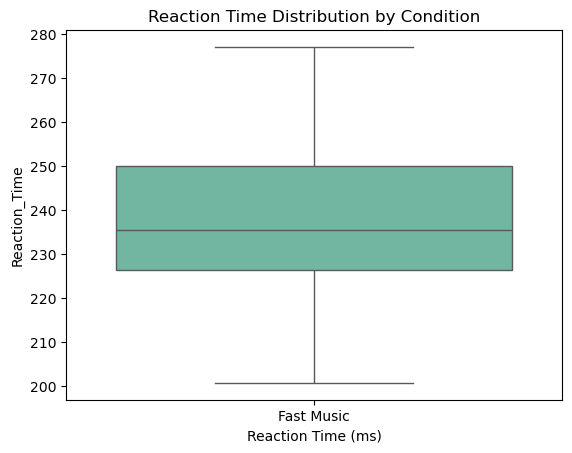

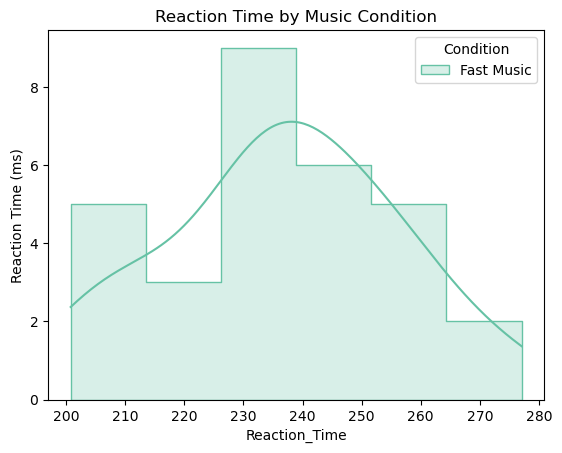

In [51]:
mean_times = df.groupby("Condition")["Reaction_Time"].mean()
print("\nAverage Reaction Times by Condition:\n", mean_times)

anova_result = stats.f_oneway(
    df[df["Condition"] == "No Music"]["Reaction_Time"],
    df[df["Condition"]== "Fast Music"]["Reaction_Time"],
    df[df["Condition"]== "Slow Music"]["Reaction_Time"]
)
print("\nAnova Result:", anova_result)

sns.boxplot(x="Condition", y="Reaction_Time", data=df, palette="Set2")
plt.title("Reaction Time Distribution by Condition")
plt.xlabel("Reaction Time (ms)")
plt.show()

sns.histplot(df, x="Reaction_Time", hue="Condition", kde=True, palette="Set2", element="step")
plt.title("Reaction Time by Music Condition")
plt.ylabel("Reaction Time (ms)")
plt.show()

In [53]:
if anova_result.pvalue < 0.05:
    print("Conclusion : Music condition significantly affects reaction time.")
else:
    print("Conclusion: No significant effect of music condition on reaction time.")

Conclusion: No significant effect of music condition on reaction time.
